# CNJCx Week 5: Practical Python

Tyler Benster
(tbenst@stanford.edu)

## Outline
### Motivation and background
### Hands-on coding

### Motivation and background
- Goals
- Anti-goals
- Extra details
- Tidy Data
- Today's Python Packages

## Goals for today
- "Day in the life" of a Pythonista
- Whirlwhind tour of foudational packages for Data Scientists in Python
- Exposure to opinionated best-practices for formating data and code
- understand the "why" of each code block
- know which library to use for particular analyses

## Anti-goals for today
- comprehend the "how" of each line of code
- know which function to use for particular analyses
- understand the math behind shown analyses
- feeling that the class is going at a comfortable pace
- understand how this presentation was made in a Jupyter notebook with RISE/reveal.js

## Extra details for eager or advanced listeners
- <details>
    <summary><a><strong>IYI</strong></a>: If You're Interested; click me! (no seriously please do :)</summary>
    Optional content will be prefaced by IYI. This is not essential for understanding the presentation, and if you are at all feeling lost or confused, now is a great time to ignore what I'm saying and ask questions in the chat. IYI is inspired by David Foster Wallace's Infinite Jest.
</details>
- Bonus: quick peak at modern deep learning in Pytorch

## Easy visualization with Tidy Data
![tidy data](https://r4ds.had.co.nz/images/tidy-1.png)

See Hadley Wickham's [publication](https://www.jstatsoft.org/article/view/v059i10) for more details and motivation.

### Hands-on coding
- Data visualization: how to make some basic plots (matplotlib, Altair)
- (5 minute break)
- Advanced data analysis: interrogate the data and visualize(scipy.stats, sklearn)
- how to read in common data formats (csv)
- data munging: what data structures and patterns to use for optimal efficiency (numpy, pytorch tensor, pandas, tidy data)

## Get this notebook running
1. open a terminal
2. navigate to folder where you want the code, e.g. `mkdir -p ~/code && cd code`
3. git clone

## First-up: matplotlib
matplotlib is the most popular plotting library in Python, and is a swiss army knife that can do virtually anything. It's also the most manual difficult to use.

Let's load some example data first

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# load data
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
for key, value in iris.items():
    if not key in ['data', 'target']:
        print(f"=========\n{key}: {value}")

frame: None
target_names: ['setosa' 'versicolor' 'virginica']
DESCR: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0

Let's create a basic scatter plot using the procedural (scripting) interface

In [6]:
iris.data.shape

(150, 4)

Text(0, 0.5, 'petal length (cm)')

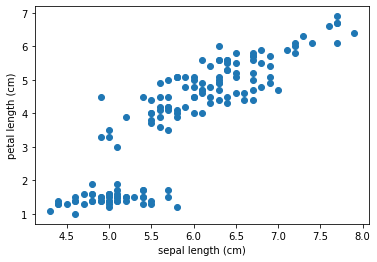

In [7]:
plt.scatter(iris.data[:,0], iris.data[:,2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

Now, we create subplots with coloring & legend using the alternate Object-oriented interface

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

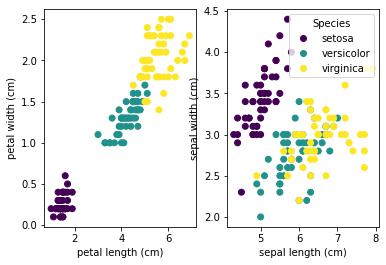

In [9]:
fig, axes = plt.subplots(nrows=1,ncols=2)
axes[0].scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
axes[0].set_xlabel(iris.feature_names[2])
axes[0].set_ylabel(iris.feature_names[3])
scatter1 = axes[1].scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
axes[1].set_xlabel(iris.feature_names[0])
axes[1].set_ylabel(iris.feature_names[1])
axes[1].legend(scatter1.legend_elements()[0],
               iris.target_names, title="Species")

Uh oh, that looks terrible. Here's a quick fix:

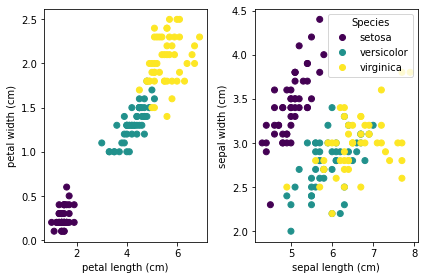

In [10]:
fig.tight_layout()
fig

Better, but legend location still problematic.

**IYI**: This can be fixed using low-level arguments like `bbox`, see [here](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)

## Surely there's a better way??
Introducing the "Grammar of Graphics"! Other python GoG packages include Seaborn and Holoviews. We use **Altair**, as it is implemented on the cross-language Vega-lite, so what you learn today can also be done in Julia or even used for interactive web-charts!

![grammar of graphics](https://miro.medium.com/max/2000/1*mcLnnVdHNg-ikDbHJfHDNA.png)

**IYI** conceptual guide [here](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)

## Introducing pandas: convient tables in python

First, let's install a python package with example datasets

In [11]:
!pip install vega_datasets

Next we load an example DataFrame

In [12]:
from vega_datasets import data
import altair as alt, pandas as pd

cars_df = data.cars()
print(f"object type: {type(cars_df)}")

object type: <class 'pandas.core.frame.DataFrame'>


DataFrames have some convenient methods to help us inspect it

In [13]:
cars_df.head(2)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA


In [29]:
cars_df.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [14]:
cars_df.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
405,chevy s-10,31.0,4,119.0,82.0,2720,19.4,1982-01-01,USA


Some of these methods can be chained:

In [15]:
cars_df.Name.tail()

401    ford mustang gl
402          vw pickup
403      dodge rampage
404        ford ranger
405         chevy s-10
Name: Name, dtype: object

Here we select a single value

In [16]:
cars_df["Name"][402]

'vw pickup'

Let's take a look at the type of each Series (column)

In [17]:
cars_df.dtypes

Name                        object
Miles_per_Gallon           float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Weight_in_lbs                int64
Acceleration               float64
Year                datetime64[ns]
Origin                      object
dtype: object

Let's see the various Origins

In [18]:
cars_df.Origin.unique()

array(['USA', 'Europe', 'Japan'], dtype=object)

We can easily do `where` queries

In [19]:
cars_df[cars_df.Origin=='USA'].head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Or chain multiple requirements

In [20]:
np.all?

In [21]:
from datetime import datetime
idxs = np.all([cars_df.Origin=='USA',
              cars_df.Horsepower>200,
              cars_df.Year<=datetime(1972,1,1)],
             axis=0)
cars_df[idxs]

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970-01-01,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970-01-01,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970-01-01,USA
19,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,1970-01-01,USA
31,ford f250,10.0,8,360.0,215.0,4615,14.0,1970-01-01,USA
33,dodge d200,11.0,8,318.0,210.0,4382,13.5,1970-01-01,USA
74,mercury marquis,11.0,8,429.0,208.0,4633,11.0,1972-01-01,USA


# Plotting Tidy Data with Altair
Since our data is Tidy, we can use the Grammar of Graphics to make plots!

In [23]:
line = alt.Chart(cars_df).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)
# https://altair-viz.github.io/user_guide/generated/core/altair.ErrorBandDef.html#altair.ErrorBandDef
band = alt.Chart(cars_df).mark_errorband(extent='ci').encode(
    x='Year',
    y=alt.Y('Miles_per_Gallon', title='Miles/Gallon'),
)

band + line

alt.LayerChart(...)

The power of this approach becomes especially apparent with complex plots that would require a lot of work for each axis with matplotlib

In [24]:
line = alt.Chart(cars_df).mark_line().encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', title="average MPG"),
    color='Cylinders:O' # we specify that the data is Ordinal, meaning ordered
).properties(
    width=180,
    height=180
).facet(
    facet='Origin:N', # data is Nominal, meaning categorical
    columns=3
)
line

alt.FacetChart(...)

### Excercise 1: make a scatter plot of Horsepower vs Acceleration, colored by Origin
Instead of `mark_line`, use `mark_point`

In [25]:
# your code here...feel free to refer to cells above!
alt.Chart(cars_df).mark_point().encode(
    x="Horsepower",
    y="Acceleration",
    color="Origin"
)

alt.Chart(...)

Let's quickly revist the Iris dataset and show off our new skills!

In [26]:
iris_df = data.iris()

alt.Chart(iris_df).mark_circle().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)),
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalWidth'
)

alt.Chart(...)

Finally, **IYI**, here's a more advanced figure: an interactive scatter & Violin plot using `selection`, `transform_filter`, and `transform_density`

In [27]:
brush = alt.selection(type='interval', resolve='global')
scatter = alt.Chart(cars_df).mark_point().encode(
    x=alt.X('Horsepower'),
    y=alt.Y('Acceleration'),
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray'))
)

violin = alt.Chart(cars_df).transform_filter(
    brush
).transform_density(
    'Miles_per_Gallon',
    as_=['Miles_per_Gallon', 'density'],
    extent=[5, 50],
    groupby=['Origin']
).mark_area(orient='horizontal').encode(
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    column=alt.Column(
        'Origin:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=100
)


plot = (scatter | violin).add_selection(
# scatter.add_selection(
    brush
).configure_facet(
     spacing=0
).configure_view(
    stroke=None
)

In [28]:
# try drawing a box on the scatter plot!B
plot

alt.HConcatChart(...)

For more, checkout this example gallery of beautiful plots with shockingly few lines of code: https://altair-viz.github.io/gallery/index.html

## (5 minute break)

**IYI** A poem while we wait

In [29]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Data munging

Suppose you get data from a collaborator. How might you read a csv and convert to Tidy Data?

We'll look at some data collected by Darwin Babino @ University of Washington. Each row contains the trial-summed response to a 0.5s flash of light

In [32]:
!ls

cnjcx_week5_practical_python.ipynb  week1_commandline  week4_codepractices
mnist				    week2_tmux_vim     week5_practical
README.md			    week3_python


In [82]:
# Read in csv file to DataFrame
rgcs_df = pd.read_csv("rgc_light_response.csv")

# Each column with number is a 1ms time bin that sums
# the number of Action potentials from `ntrials`.
# i, j index the 2D electrode array.
# unit_num identifies puported individual neurons recorded from each electrode.
rgcs_df.head(5)

,retina,id,i,j,unit_num,ntrials,0,1,2,3,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_1",3,6,1,18,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_3",3,6,3,18,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_0",3,6,0,18,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_5",3,6,5,18,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_4",3,6,4,18,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# Note: if you're coming from Matlab, you might be tempted to write a for loop
# sometimes this can't be avoided, but in general writing for-loops is discouraged
# in Python. They are slow in interpreted languages and usually there's a better way

rgcs_tidy = pd.melt(rgcs_df, id_vars=['retina', 'id', 'ntrials'],
        var_name="time_bin",
        value_name="spike_count",
        value_vars=list(map(str, np.arange(3500))))
rgcs_tidy

,retina,id,ntrials,time_bin,spike_count
0,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_1",18,0,0.0
1,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_3",18,0,0.0
2,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_0",18,0,0.0
3,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_5",18,0,0.0
4,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_4",18,0,0.0
...,...,...,...,...,...
857495,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(4, 7)_1",18,3499,0.0
857496,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(4, 7)_2",18,3499,0.0
857497,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(4, 7)_3",18,3499,0.0
857498,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(4, 7)_0",18,3499,0.0


Normalize spike count by number of trials

In [84]:
# 1ms time bins
time_bin = 1000
rgcs_tidy["time"] = (pd.to_numeric(rgcs_tidy.time_bin) + 1) / time_bin
rgcs_tidy["firing_rate"] = rgcs_tidy.spike_count / rgcs_tidy.ntrials * time_bin
rgcs_tidy.drop(columns=["spike_count", "ntrials", "time_bin"], inplace=True)
rgcs_tidy

,retina,id,time,firing_rate
0,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_1",0.001,0.0
1,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_3",0.001,0.0
2,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_0",0.001,0.0
3,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_5",0.001,0.0
4,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_4",0.001,0.0
...,...,...,...,...
857495,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(4, 7)_1",3.500,0.0
857496,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(4, 7)_2",3.500,0.0
857497,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(4, 7)_3",3.500,0.0
857498,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(4, 7)_0",3.500,0.0


Instead, let's prepare to plot with matplotlib. First, we create a nSamples x nFeatures matrix

In [85]:
# effectively, this undoes our melt operation
rgcs_tidy.pivot(index='id', columns='time', values='firing_rate').head()

time,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,3.491,3.492,3.493,3.494,3.495,3.496,3.497,3.498,3.499,3.500
id,,,,,,,,,,,,,,,,,,,,,
"R1_E1_AMES_130min_checkerboard_contrast_(0, 1)_0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"R1_E1_AMES_130min_checkerboard_contrast_(0, 1)_1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"R1_E1_AMES_130min_checkerboard_contrast_(0, 1)_2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.555556,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"R1_E1_AMES_130min_checkerboard_contrast_(0, 1)_3",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"R1_E1_AMES_130min_checkerboard_contrast_(0, 2)_0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# convert to ndarray
rgc_mat = np.array(rgcs_tidy.pivot(index='id', columns='time', values='firing_rate'))

(0.0, 3.5)

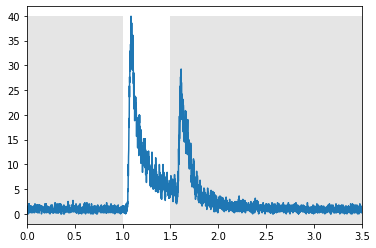

In [87]:
from matplotlib import patches
from typing import Tuple
time = np.arange(rgc_mat.shape[1])/1000 # convert to seconds
fig, ax = plt.subplots()
ax.plot(time, rgc_mat.mean(0))
ylim = ax.get_ylim()
# Create a Rectangle patch

def make_rect(start:float, duration:float, ylim:Tuple[float, float]):
    return patches.Rectangle((start, ylim[0]), duration, ylim[1],
                             facecolor='black', alpha=0.1)

# we make small helper function to follow DRY: Don't repeat yourself
rect1 = make_rect(0,1, ylim)
rect2 = make_rect(1.5,2, ylim)

# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.set_xlim(0,3.5)

## Calculating instantaneous firing rate
$\omega(\tau) = \frac{1}{\sqrt{2\pi}\sigma_\omega}\exp\left({-\frac{\tau^2}{2\sigma_\omega^2}}\right)$

(to type this in markdown):
```
$\omega(\tau) = \frac{1}{\sqrt{2\pi}\sigma_\omega}\exp\left({-\frac{\tau^2}{2\sigma_\omega^2}}\right)$
```

**IYI**: see 1.11 from [Dayan and Abbott](http://www.gatsby.ucl.ac.uk/~lmate/biblio/dayanabbott.pdf)

In [88]:
from scipy import signal
# estimate firing rate using gaussian smoothing
sigma = 6
bandwidth = 0.05 # sec
bin_width = 0.001
transformed_sigma = bandwidth/bin_width
window = signal.gaussian(2*sigma*transformed_sigma,
                         std=transformed_sigma)[None]

# instantaneous firing rate (acausal)
ifr = signal.convolve(rgc_mat, window,mode="same") \
             / (transformed_sigma*np.sqrt(2*np.pi))

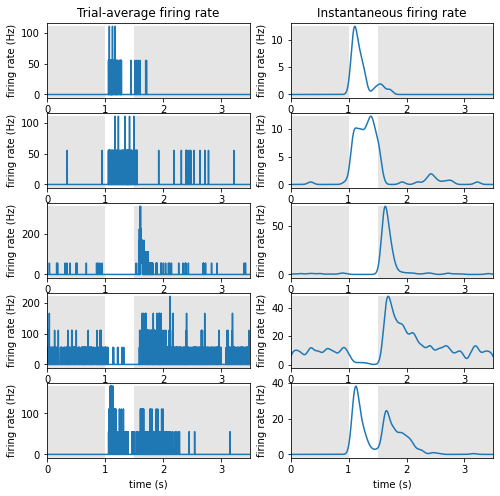

In [160]:
def plot_rgc_trace(ax, trace, time=time,
                   light_on=1, light_off=1.5):
    ax.plot(time,trace)
    ylim = ax.get_ylim()
    rect1 = make_rect(0,1, ylim)
    rect2 = make_rect(1.5,2, ylim)
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.set_xlim(0,3.5)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("firing rate (Hz)")

fig, axes = plt.subplots(5,2, figsize=(8,8))
plot_rgc_trace(axes[0,0], rgc_mat[13])
axes[0,0].set_title("Trial-average firing rate")
axes[0,1].set_title("Instantaneous firing rate")
plot_rgc_trace(axes[0,1], ifr[13])

for i,c in zip(range(1,6),[33, 23, 19, 21]):
    plot_rgc_trace(axes[i,0], rgc_mat[c])
    plot_rgc_trace(axes[i,1], ifr[c])

## Statistical analysis
Now that we have experience with some data munging and visualization, let's try our hand at a quick statistical analysis using **scipy**!

Question: In Iris dataset, does sepal length vary in a statistically significant way across the three species?


In [41]:
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# let's take a quick look at the data for intuition
alt.Chart(iris_df).mark_bar().encode(
    x=alt.X("sepalWidth", bin=alt.Bin(step=0.25)),
    y="count(sepalWidth)",
    color="species"
)

alt.Chart(...)

We run an ANOVA

In [43]:
import scipy.stats as stats
species = iris_df.species.unique()
data = [iris_df.sepalWidth[iris_df.species == s] for s in species]
F, p = stats.f_oneway(*data)
# We reject the null
F, p

(49.160040089612075, 4.492017133309115e-17)

## sklearn: a unified interface to machine learning
As long as your data can be organized into a nSamples x nFeatures matrix and fits in RAM, you can use sklearn!

Let's try our hand at dimensionality reduction

In [162]:
from sklearn.decomposition import PCA

# turn species into vector of integers
species_vector = iris_df.species.astype('category').cat.codes

# drop species & create data matrix
data = np.array(iris_df.iloc[:,:-1])

pca = PCA(n_components=2)
projected_data = pca.fit_transform(data)

plt.scatter(projected_data[:,0], projected_data[:,1],
           c = species_vector)

# IYI: try adding a legend!

NameError: name 'iris_df' is not defined

Text(0.5, 1.0, 'Count by cluster label')

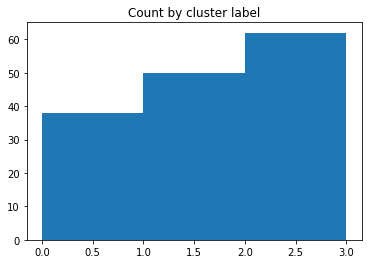

In [45]:
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data)

plt.hist(kmeans.labels_, bins=np.arange(kmeans.labels_.max()+2))
plt.title("Count by cluster label")

NameError: name 'projected_data' is not defined

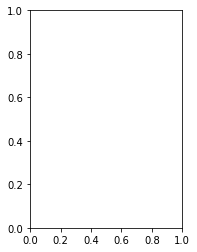

In [163]:
from sklearn.manifold import TSNE
plt.figure()
plt.subplot(121)
plt.scatter(projected_data[:,0], projected_data[:,1],
           c = species_vector)
plt.title("True labels")
plt.subplot(122)
plt.scatter(projected_data[:,0], projected_data[:,1],
           c = kmeans.labels_)
plt.title("Clustered labels")

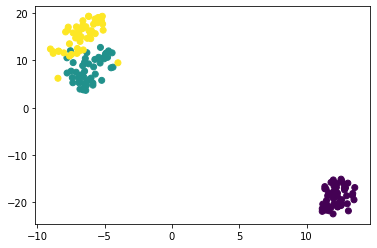

In [56]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(data)

plt.scatter(tsne_data[:,0], tsne_data[:,1],
           c = species_vector)

## Bonus: Variational auto-encoder in PyTorch

This download may take a while, so feel free to just watch :)

![mnist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [7]:
!pip install torch torchvision
!mkdir -p mnist

In [62]:
import torch
from torchvision import datasets, transforms

from torch import nn, optim, utils
from torchvision import datasets, transforms
from torch.nn import functional as F
import torchvision.utils
from functools import partial

device = torch.device("cpu")
torch.manual_seed(20200909) # reproducible analysis

batch_size = 64
kwargs = {'num_workers': 1, 'pin_memory': True}
mnist_train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./mnist', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
mnist_test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./mnist', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

# shape is batch_size x 1 x 28 x 28

## Now witness the firepower of this fully armed and operational Notebook!

**IYI**: see a full presentation [here](https://github.com/tbenst/cnjc-vae/blob/master/main.pdf)

In [81]:
# subclass PyTorch Module for reverse-mode autodifferentiation 
# for easy backpropogation of loss gradient
class VAE(nn.Module):
    
    def __init__(self, nfeatures,nlatent=20):
        super(VAE, self).__init__()
        self.nfeatures = nfeatures
        self.nhidden = int(nfeatures/5)
        
        # nn.Linear is a "dense" layer of form y = Ax + b
        
        # Encoder layers
        self.hidden_encoder = nn.Linear(nfeatures, self.nhidden)
        # mean encoding layer 
        self.mean_encoder = nn.Linear(self.nhidden, nlatent)
        # log variance encoding layer 
        self.logvar_encoder = nn.Linear(self.nhidden, nlatent)
        
        # Decoder layers
        self.hidden_decoder = nn.Linear(nlatent, int(nfeatures/5))
        self.reconstruction_decoder = nn.Linear(self.nhidden, nfeatures)

    def encode(self, x):
        # we use a ReLu (rectified linear unit) activation function
        h1 = F.relu(self.hidden_encoder(x))
        return self.mean_encoder(h1), self.logvar_encoder(h1)

    def reparameterize(self, mean, logvar):
        """Reparameterize out stochastic node so the gradient can propogate 
           deterministically."""

        if self.training:
            standard_deviation = torch.exp(0.5*logvar)
            # sample from unit gaussian with same shape as standard_deviation
            epsilon = torch.randn_like(standard_deviation)
            return epsilon * standard_deviation + mean
        else:
            return mean

    def decode(self, z):
        h3 = F.relu(self.hidden_decoder(z))
        # use sigmoid to bound output to (0,1)
        return F.sigmoid(self.reconstruction_decoder(h3))

    
    def forward(self, x):
        "A special method in PyTorch modules that is called by __call__"
        
        # flatten batch x height x width into batch x nFeatures, then encode
        mean, logvar = self.encode(x.view(-1, self.nfeatures))
        # sample an embedding, z
        z = self.reparameterize(mean, logvar)
        # return the (sampled) reconstruction, mean, and log variance
        return self.decode(z), mean, logvar
    
def loss_function(recon_x, x, mu, logvar, nfeatures):
    "Reconstruction + KL divergence losses summed over all elements and batch."
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, nfeatures), size_average=False)

    # we want KLD = - 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    # where sigma is standard deviation and mu is mean
    # (interested? check out Appendix B of https://arxiv.org/abs/1312.6114)
    # In pytorch, x^2 is written as x.pow(2), e^x is written as x.exp(),
    # and sum_{i=1}^n (x_i + y_i) for x,y of length n
    # can be written as torch.sum(x+y)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

def train(epoch, model, optimizer, train_loader, log_interval=10):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):
        data = data[0].to(device)  # we ignore any labels & transfer to GPU
        nfeatures = data[0].numel()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar, nfeatures)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch, model, test_loader,folder="results"):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            data = data[0].to(device)
            nfeatures = data[0].numel()
            n = min(data.size(0), 15)
            if len(data.shape)==3:
                  # zebrafish
                _, H, W = data.shape
                dat = data[:n,None]
            elif len(data.shape)==4:
                  # MNIST
                _, _, H, W = data.shape
                dat = data[:n]
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar, nfeatures).item()
            if i == 0:              
                comparison = torch.cat([dat,
                                   recon_batch.view(-1, 1, H, W)[:n]])
                torchvision.utils.save_image(comparison.cpu(),
                         folder+'/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

In [82]:
# run cell to reset model
nfeatures = 28**2
# we use a latent space of dimension 2 as to get an easy-to-visualize manifold
# (see mnist/sample_*.png while running next cell)
nlatent = 2
mnist_model = VAE(nfeatures,nlatent=nlatent).to(device)
mnist_optimizer = optim.Adam(mnist_model.parameters(), lr=1e-3)
!rm mnist/*

rm: cannot remove 'mnist/MNIST': Is a directory


In [85]:
# this will take two minutes to run.
# As it does, check out the mnist folder!
# each epoch, reconstruction examples are saved (original on top) 
# select files on right, then refresh, and double click image
# click bottom right corner of image to resize

nepochs = 5
H, W = (28,28)

# make grid of z1 x z2 where z1,z2 \elem (-3.5,-2.5, ..., 3.5)
nrow = 25
latents = torch.zeros(nrow,nrow,nlatent)
z1_tick = np.linspace(-3.5,3.5,nrow)
z2_tick = np.linspace(-3.5,3.5,nrow)
for i, z1 in enumerate(z1_tick):
    for j, z2 in enumerate(z2_tick):
        latents[i,j,[0,1]] = torch.FloatTensor([z1,z2])
latents = latents.to(device)

for epoch in range(1, nepochs + 1):
    train(epoch, mnist_model, mnist_optimizer, mnist_train_loader)
    test(epoch, mnist_model, mnist_test_loader,folder='mnist')
    with torch.no_grad():
        latent_space = mnist_model.decode(latents.view(-1,nlatent)).cpu()
        torchvision.utils.save_image(latent_space.view(-1, 1, H, W),
                   'mnist/sample_' + str(epoch) + '.png',nrow=nrow)

Train Epoch: 1 [0/60000 (0%)]	Loss: 154.415421
Train Epoch: 1 [640/60000 (1%)]	Loss: 170.343307
Train Epoch: 1 [1280/60000 (2%)]	Loss: 157.011810
Train Epoch: 1 [1920/60000 (3%)]	Loss: 153.011597
Train Epoch: 1 [2560/60000 (4%)]	Loss: 163.962433
Train Epoch: 1 [3200/60000 (5%)]	Loss: 148.729721
Train Epoch: 1 [3840/60000 (6%)]	Loss: 152.544373
Train Epoch: 1 [4480/60000 (7%)]	Loss: 152.297745
Train Epoch: 1 [5120/60000 (9%)]	Loss: 154.545303
Train Epoch: 1 [5760/60000 (10%)]	Loss: 154.624405
Train Epoch: 1 [6400/60000 (11%)]	Loss: 160.131622
Train Epoch: 1 [7040/60000 (12%)]	Loss: 153.148560
Train Epoch: 1 [7680/60000 (13%)]	Loss: 153.213837
Train Epoch: 1 [8320/60000 (14%)]	Loss: 150.248215
Train Epoch: 1 [8960/60000 (15%)]	Loss: 159.359863
Train Epoch: 1 [9600/60000 (16%)]	Loss: 165.470047
Train Epoch: 1 [10240/60000 (17%)]	Loss: 163.297180
Train Epoch: 1 [10880/60000 (18%)]	Loss: 156.656296
Train Epoch: 1 [11520/60000 (19%)]	Loss: 160.172104
Train Epoch: 1 [12160/60000 (20%)]	Loss: 

Train Epoch: 2 [40960/60000 (68%)]	Loss: 148.836639
Train Epoch: 2 [41600/60000 (69%)]	Loss: 162.841736
Train Epoch: 2 [42240/60000 (70%)]	Loss: 157.319153
Train Epoch: 2 [42880/60000 (71%)]	Loss: 149.242203
Train Epoch: 2 [43520/60000 (72%)]	Loss: 152.183182
Train Epoch: 2 [44160/60000 (74%)]	Loss: 159.573166
Train Epoch: 2 [44800/60000 (75%)]	Loss: 151.142670
Train Epoch: 2 [45440/60000 (76%)]	Loss: 150.529526
Train Epoch: 2 [46080/60000 (77%)]	Loss: 149.348282
Train Epoch: 2 [46720/60000 (78%)]	Loss: 154.270203
Train Epoch: 2 [47360/60000 (79%)]	Loss: 169.331192
Train Epoch: 2 [48000/60000 (80%)]	Loss: 169.610626
Train Epoch: 2 [48640/60000 (81%)]	Loss: 152.251862
Train Epoch: 2 [49280/60000 (82%)]	Loss: 159.470062
Train Epoch: 2 [49920/60000 (83%)]	Loss: 163.567688
Train Epoch: 2 [50560/60000 (84%)]	Loss: 150.423492
Train Epoch: 2 [51200/60000 (85%)]	Loss: 146.771530
Train Epoch: 2 [51840/60000 (86%)]	Loss: 150.764832
Train Epoch: 2 [52480/60000 (87%)]	Loss: 159.936005
Train Epoch:

Train Epoch: 4 [21760/60000 (36%)]	Loss: 155.115005
Train Epoch: 4 [22400/60000 (37%)]	Loss: 150.187561
Train Epoch: 4 [23040/60000 (38%)]	Loss: 158.794418
Train Epoch: 4 [23680/60000 (39%)]	Loss: 136.354614
Train Epoch: 4 [24320/60000 (41%)]	Loss: 159.098145
Train Epoch: 4 [24960/60000 (42%)]	Loss: 152.680573
Train Epoch: 4 [25600/60000 (43%)]	Loss: 156.800323
Train Epoch: 4 [26240/60000 (44%)]	Loss: 161.909119
Train Epoch: 4 [26880/60000 (45%)]	Loss: 153.276794
Train Epoch: 4 [27520/60000 (46%)]	Loss: 156.513367
Train Epoch: 4 [28160/60000 (47%)]	Loss: 156.810272
Train Epoch: 4 [28800/60000 (48%)]	Loss: 159.249771
Train Epoch: 4 [29440/60000 (49%)]	Loss: 167.106537
Train Epoch: 4 [30080/60000 (50%)]	Loss: 165.332138
Train Epoch: 4 [30720/60000 (51%)]	Loss: 137.777878
Train Epoch: 4 [31360/60000 (52%)]	Loss: 156.456146
Train Epoch: 4 [32000/60000 (53%)]	Loss: 154.988953
Train Epoch: 4 [32640/60000 (54%)]	Loss: 154.270096
Train Epoch: 4 [33280/60000 (55%)]	Loss: 157.616150
Train Epoch:

Train Epoch: 6 [1280/60000 (2%)]	Loss: 162.331161
Train Epoch: 6 [1920/60000 (3%)]	Loss: 152.179520
Train Epoch: 6 [2560/60000 (4%)]	Loss: 148.703522
Train Epoch: 6 [3200/60000 (5%)]	Loss: 154.470261
Train Epoch: 6 [3840/60000 (6%)]	Loss: 159.332245
Train Epoch: 6 [4480/60000 (7%)]	Loss: 146.124481
Train Epoch: 6 [5120/60000 (9%)]	Loss: 151.102112
Train Epoch: 6 [5760/60000 (10%)]	Loss: 147.770248
Train Epoch: 6 [6400/60000 (11%)]	Loss: 158.449234
Train Epoch: 6 [7040/60000 (12%)]	Loss: 152.565796
Train Epoch: 6 [7680/60000 (13%)]	Loss: 163.870102
Train Epoch: 6 [8320/60000 (14%)]	Loss: 156.619324
Train Epoch: 6 [8960/60000 (15%)]	Loss: 150.644485
Train Epoch: 6 [9600/60000 (16%)]	Loss: 151.725876
Train Epoch: 6 [10240/60000 (17%)]	Loss: 154.603455
Train Epoch: 6 [10880/60000 (18%)]	Loss: 159.923019
Train Epoch: 6 [11520/60000 (19%)]	Loss: 152.877792
Train Epoch: 6 [12160/60000 (20%)]	Loss: 147.741287
Train Epoch: 6 [12800/60000 (21%)]	Loss: 151.322342
Train Epoch: 6 [13440/60000 (22%)

Train Epoch: 7 [42880/60000 (71%)]	Loss: 156.470779
Train Epoch: 7 [43520/60000 (72%)]	Loss: 153.545029
Train Epoch: 7 [44160/60000 (74%)]	Loss: 153.771713
Train Epoch: 7 [44800/60000 (75%)]	Loss: 151.239594
Train Epoch: 7 [45440/60000 (76%)]	Loss: 164.799713
Train Epoch: 7 [46080/60000 (77%)]	Loss: 147.701981
Train Epoch: 7 [46720/60000 (78%)]	Loss: 147.250031
Train Epoch: 7 [47360/60000 (79%)]	Loss: 160.070038
Train Epoch: 7 [48000/60000 (80%)]	Loss: 161.377411
Train Epoch: 7 [48640/60000 (81%)]	Loss: 145.364365
Train Epoch: 7 [49280/60000 (82%)]	Loss: 145.820251
Train Epoch: 7 [49920/60000 (83%)]	Loss: 154.878693
Train Epoch: 7 [50560/60000 (84%)]	Loss: 152.031906
Train Epoch: 7 [51200/60000 (85%)]	Loss: 157.832306
Train Epoch: 7 [51840/60000 (86%)]	Loss: 153.182922
Train Epoch: 7 [52480/60000 (87%)]	Loss: 162.874619
Train Epoch: 7 [53120/60000 (88%)]	Loss: 149.940414
Train Epoch: 7 [53760/60000 (90%)]	Loss: 145.481750
Train Epoch: 7 [54400/60000 (91%)]	Loss: 154.995316
Train Epoch:

Train Epoch: 9 [24320/60000 (41%)]	Loss: 157.193390
Train Epoch: 9 [24960/60000 (42%)]	Loss: 149.469604
Train Epoch: 9 [25600/60000 (43%)]	Loss: 148.902252
Train Epoch: 9 [26240/60000 (44%)]	Loss: 164.275955
Train Epoch: 9 [26880/60000 (45%)]	Loss: 143.872543
Train Epoch: 9 [27520/60000 (46%)]	Loss: 158.295578
Train Epoch: 9 [28160/60000 (47%)]	Loss: 159.467758
Train Epoch: 9 [28800/60000 (48%)]	Loss: 147.237518
Train Epoch: 9 [29440/60000 (49%)]	Loss: 149.923553
Train Epoch: 9 [30080/60000 (50%)]	Loss: 148.034927
Train Epoch: 9 [30720/60000 (51%)]	Loss: 157.611252
Train Epoch: 9 [31360/60000 (52%)]	Loss: 155.577591
Train Epoch: 9 [32000/60000 (53%)]	Loss: 154.140060
Train Epoch: 9 [32640/60000 (54%)]	Loss: 162.817581
Train Epoch: 9 [33280/60000 (55%)]	Loss: 152.765060
Train Epoch: 9 [33920/60000 (57%)]	Loss: 164.563889
Train Epoch: 9 [34560/60000 (58%)]	Loss: 154.796295
Train Epoch: 9 [35200/60000 (59%)]	Loss: 153.625885
Train Epoch: 9 [35840/60000 (60%)]	Loss: 145.905716
Train Epoch:

Train Epoch: 11 [2560/60000 (4%)]	Loss: 147.265961
Train Epoch: 11 [3200/60000 (5%)]	Loss: 151.417435
Train Epoch: 11 [3840/60000 (6%)]	Loss: 163.033707
Train Epoch: 11 [4480/60000 (7%)]	Loss: 155.245163
Train Epoch: 11 [5120/60000 (9%)]	Loss: 144.653381
Train Epoch: 11 [5760/60000 (10%)]	Loss: 153.602890
Train Epoch: 11 [6400/60000 (11%)]	Loss: 142.036072
Train Epoch: 11 [7040/60000 (12%)]	Loss: 158.499573
Train Epoch: 11 [7680/60000 (13%)]	Loss: 155.472427
Train Epoch: 11 [8320/60000 (14%)]	Loss: 155.495911
Train Epoch: 11 [8960/60000 (15%)]	Loss: 142.389236
Train Epoch: 11 [9600/60000 (16%)]	Loss: 149.248199
Train Epoch: 11 [10240/60000 (17%)]	Loss: 149.682693
Train Epoch: 11 [10880/60000 (18%)]	Loss: 143.835861
Train Epoch: 11 [11520/60000 (19%)]	Loss: 155.027969
Train Epoch: 11 [12160/60000 (20%)]	Loss: 147.163849
Train Epoch: 11 [12800/60000 (21%)]	Loss: 149.201630
Train Epoch: 11 [13440/60000 (22%)]	Loss: 151.409225
Train Epoch: 11 [14080/60000 (23%)]	Loss: 152.009094
Train Epoc

Train Epoch: 12 [42240/60000 (70%)]	Loss: 155.873642
Train Epoch: 12 [42880/60000 (71%)]	Loss: 146.662399
Train Epoch: 12 [43520/60000 (72%)]	Loss: 156.914536
Train Epoch: 12 [44160/60000 (74%)]	Loss: 147.623657
Train Epoch: 12 [44800/60000 (75%)]	Loss: 147.277832
Train Epoch: 12 [45440/60000 (76%)]	Loss: 148.331085
Train Epoch: 12 [46080/60000 (77%)]	Loss: 150.062149
Train Epoch: 12 [46720/60000 (78%)]	Loss: 155.954773
Train Epoch: 12 [47360/60000 (79%)]	Loss: 143.845566
Train Epoch: 12 [48000/60000 (80%)]	Loss: 156.915558
Train Epoch: 12 [48640/60000 (81%)]	Loss: 144.675674
Train Epoch: 12 [49280/60000 (82%)]	Loss: 146.151764
Train Epoch: 12 [49920/60000 (83%)]	Loss: 142.727829
Train Epoch: 12 [50560/60000 (84%)]	Loss: 146.823257
Train Epoch: 12 [51200/60000 (85%)]	Loss: 160.422104
Train Epoch: 12 [51840/60000 (86%)]	Loss: 148.164322
Train Epoch: 12 [52480/60000 (87%)]	Loss: 147.039001
Train Epoch: 12 [53120/60000 (88%)]	Loss: 149.172943
Train Epoch: 12 [53760/60000 (90%)]	Loss: 151.

Train Epoch: 14 [21120/60000 (35%)]	Loss: 151.399704
Train Epoch: 14 [21760/60000 (36%)]	Loss: 159.527145
Train Epoch: 14 [22400/60000 (37%)]	Loss: 155.233017
Train Epoch: 14 [23040/60000 (38%)]	Loss: 161.109238
Train Epoch: 14 [23680/60000 (39%)]	Loss: 153.884811
Train Epoch: 14 [24320/60000 (41%)]	Loss: 156.655014
Train Epoch: 14 [24960/60000 (42%)]	Loss: 164.376389
Train Epoch: 14 [25600/60000 (43%)]	Loss: 156.483734
Train Epoch: 14 [26240/60000 (44%)]	Loss: 149.583923
Train Epoch: 14 [26880/60000 (45%)]	Loss: 149.048935
Train Epoch: 14 [27520/60000 (46%)]	Loss: 157.391342
Train Epoch: 14 [28160/60000 (47%)]	Loss: 157.544388
Train Epoch: 14 [28800/60000 (48%)]	Loss: 148.288177
Train Epoch: 14 [29440/60000 (49%)]	Loss: 158.023209
Train Epoch: 14 [30080/60000 (50%)]	Loss: 150.576004
Train Epoch: 14 [30720/60000 (51%)]	Loss: 146.365875
Train Epoch: 14 [31360/60000 (52%)]	Loss: 145.592957
Train Epoch: 14 [32000/60000 (53%)]	Loss: 162.621353
Train Epoch: 14 [32640/60000 (54%)]	Loss: 150.

Train Epoch: 15 [59520/60000 (99%)]	Loss: 165.206558
====> Epoch: 15 Average loss: 151.1163
====> Test set loss: 150.8625
Train Epoch: 16 [0/60000 (0%)]	Loss: 146.002777
Train Epoch: 16 [640/60000 (1%)]	Loss: 153.574585
Train Epoch: 16 [1280/60000 (2%)]	Loss: 152.410889
Train Epoch: 16 [1920/60000 (3%)]	Loss: 160.166428
Train Epoch: 16 [2560/60000 (4%)]	Loss: 142.561050
Train Epoch: 16 [3200/60000 (5%)]	Loss: 147.095871
Train Epoch: 16 [3840/60000 (6%)]	Loss: 156.946548
Train Epoch: 16 [4480/60000 (7%)]	Loss: 144.650848
Train Epoch: 16 [5120/60000 (9%)]	Loss: 156.415405
Train Epoch: 16 [5760/60000 (10%)]	Loss: 152.052017
Train Epoch: 16 [6400/60000 (11%)]	Loss: 148.668930
Train Epoch: 16 [7040/60000 (12%)]	Loss: 150.179520
Train Epoch: 16 [7680/60000 (13%)]	Loss: 151.079956
Train Epoch: 16 [8320/60000 (14%)]	Loss: 151.555130
Train Epoch: 16 [8960/60000 (15%)]	Loss: 153.510620
Train Epoch: 16 [9600/60000 (16%)]	Loss: 148.105118
Train Epoch: 16 [10240/60000 (17%)]	Loss: 153.939255
Train 

Train Epoch: 17 [39040/60000 (65%)]	Loss: 152.724701
Train Epoch: 17 [39680/60000 (66%)]	Loss: 152.862137
Train Epoch: 17 [40320/60000 (67%)]	Loss: 145.411896
Train Epoch: 17 [40960/60000 (68%)]	Loss: 144.619278
Train Epoch: 17 [41600/60000 (69%)]	Loss: 155.109512
Train Epoch: 17 [42240/60000 (70%)]	Loss: 159.262512
Train Epoch: 17 [42880/60000 (71%)]	Loss: 166.582291
Train Epoch: 17 [43520/60000 (72%)]	Loss: 148.888840
Train Epoch: 17 [44160/60000 (74%)]	Loss: 158.029648
Train Epoch: 17 [44800/60000 (75%)]	Loss: 154.224014
Train Epoch: 17 [45440/60000 (76%)]	Loss: 150.007629
Train Epoch: 17 [46080/60000 (77%)]	Loss: 164.097214
Train Epoch: 17 [46720/60000 (78%)]	Loss: 150.175842
Train Epoch: 17 [47360/60000 (79%)]	Loss: 161.773132
Train Epoch: 17 [48000/60000 (80%)]	Loss: 142.036285
Train Epoch: 17 [48640/60000 (81%)]	Loss: 159.076920
Train Epoch: 17 [49280/60000 (82%)]	Loss: 148.144699
Train Epoch: 17 [49920/60000 (83%)]	Loss: 154.517807
Train Epoch: 17 [50560/60000 (84%)]	Loss: 153.

Train Epoch: 19 [18560/60000 (31%)]	Loss: 142.461716
Train Epoch: 19 [19200/60000 (32%)]	Loss: 147.149170
Train Epoch: 19 [19840/60000 (33%)]	Loss: 149.993134
Train Epoch: 19 [20480/60000 (34%)]	Loss: 147.178238
Train Epoch: 19 [21120/60000 (35%)]	Loss: 154.339752
Train Epoch: 19 [21760/60000 (36%)]	Loss: 145.170273
Train Epoch: 19 [22400/60000 (37%)]	Loss: 148.555084
Train Epoch: 19 [23040/60000 (38%)]	Loss: 150.681366
Train Epoch: 19 [23680/60000 (39%)]	Loss: 139.909729
Train Epoch: 19 [24320/60000 (41%)]	Loss: 151.666183
Train Epoch: 19 [24960/60000 (42%)]	Loss: 149.032532
Train Epoch: 19 [25600/60000 (43%)]	Loss: 145.213776
Train Epoch: 19 [26240/60000 (44%)]	Loss: 157.569000
Train Epoch: 19 [26880/60000 (45%)]	Loss: 158.197983
Train Epoch: 19 [27520/60000 (46%)]	Loss: 145.676712
Train Epoch: 19 [28160/60000 (47%)]	Loss: 158.919952
Train Epoch: 19 [28800/60000 (48%)]	Loss: 150.587906
Train Epoch: 19 [29440/60000 (49%)]	Loss: 150.717468
Train Epoch: 19 [30080/60000 (50%)]	Loss: 148.

Train Epoch: 20 [57600/60000 (96%)]	Loss: 149.581696
Train Epoch: 20 [58240/60000 (97%)]	Loss: 154.371582
Train Epoch: 20 [58880/60000 (98%)]	Loss: 145.115768
Train Epoch: 20 [59520/60000 (99%)]	Loss: 146.061478
====> Epoch: 20 Average loss: 150.0162
====> Test set loss: 150.0594


In [ ]:
TO ADD:
- ANTI-Patterns
- General tips
- second excercise cell? (don't have time for live...)

Logistical details: meet at 4:30 / 4:40? test internet, etc.

As Pretty as Mathematica?

In [ ]:
from matplotlib import cm

In [ ]:
num_clusters = optics.labels_.max()+1 # 0-index
unit_interval_class = optics.labels_ / num_clusters

In [ ]:
colors = [cm.tab20(f) if f>=0 else cm.colors.to_rgba("gray")
          for f in unit_interval_class[::10]]
plt.scatter(tsne_data[:,0], tsne_data[:,1],
            color=colors)

In [ ]:
rgcs_df

In [ ]:
pd.melt?

In [ ]:
rgcs_with_cluster = rgcs_df.copy()
rgcs_with_cluster["cluster"] = optics.labels_
# filter to include only clustered cells
rgcs_with_cluster = rgcs_with_cluster[rgcs_with_cluster.cluster!=-1]
tidy_data = pd.melt(rgcs_with_cluster, id_vars=['retina', 'id', 'ntrials', "cluster"],
        var_name="time_bin",
        value_name="spike_count",
        value_vars=list(map(str, np.arange(35))))
# 100ms time bins
tidy_data["time"] = pd.to_numeric(tidy_data.time_bin) / 10
tidy_data["firing_rate"] = tidy_data.spike_count / tidy_data.ntrials * 10
tidy_data.drop(columns=["spike_count", "ntrials", "time_bin"], inplace=True)
tidy_data

In [ ]:
## Altair

In [ ]:
alt.Chart(tidy_data).mark_line().encode(
    x = "time",
    y = "mean(firing_rate)"
)

In [ ]:
# from hd
from hdbscan import HDBSCAN

In [ ]:
pip install vega_datasets

In [ ]:
import hdbscan

In [ ]:
hdbscan
optics.labels_.max()

In [ ]:
## archive

In [86]:
!pwd

/home/tyler/code/cnjcx-course-materials


In [5]:
cols = "retina,id,i,j,unit_num,ntrials".split(",") + list(map(str,np.arange(3500)))

In [9]:
csv = pd.read_csv("/home/tyler/Dropbox/Science/manuscripts/2019_acuity_paper/acuity_paper/code/integrity_units_1ms.csv",
                 index_col=False,
                 names=cols)[1:]

/home/tyler/lib/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
import pandas as pd

In [76]:
csv = csv[csv.retina=="R1_E1_AMES_130min_checkerboard_contrast"].drop_duplicates(['id'])

In [77]:
csv.to_csv("rgc_light_response.csv", index=False)

## Solutions